### Vectorial data
Using Lombardia region underground stations geodata.

In [1]:
import geopandas as gpd

In [2]:
stations = gpd.read_file('Stazioni_Metropolitana.shp')

In [3]:
stations.sample(5)

OBJECTID  ID_FERMATA          NOME  LINEA  CODSAF  COMUNE  \
41         42           8       Moscova    2.0   683.0     0.0   
64         65         104  Assago Forum    2.0   694.0     0.0   
99        100        1318       Segneri    4.0     0.0     0.0   
7           8          40    Buonarroti    1.0   525.0     0.0   
131       132        7011     Lamarmora    0.0     0.0     0.0   

                     DTIPO_MOD COD_LM                NOME_LM  \
41   Stazione di metropolitana    MM2  Linea 2 - Linea Verde   
64   Stazione di metropolitana    MM2  Linea 2 - Linea Verde   
99   Stazione di metropolitana    MM4    Linea 4 - Linea Blu   
7    Stazione di metropolitana    MM1  Linea 1 - Linea Rossa   
131  Stazione di metropolitana    BS1          Metro Brescia   

                           geometry  
41   POINT (514421.153 5036046.376)  
64   POINT (511371.823 5027613.796)  
99   POINT (510228.601 5032596.931)  
7    POINT (512143.437 5035218.220)  
131  POINT (594761.907 5041567.322)

In [4]:
stations.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
centrale = stations[stations.NOME == 'Centrale Fs']
assago = stations[stations.NOME == 'Assago Forum']
centrale.index, assago.index

(Int64Index([143], dtype='int64'), Int64Index([64], dtype='int64'))

In [6]:
assago.distance(centrale, align=False).values[0]

10186.426172147092

In [7]:
assago.to_crs(4326).distance(centrale.to_crs(4326), align=False).values[0]

/tmp/ipykernel_17275/3915993712.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  assago.to_crs(4326).distance(centrale.to_crs(4326), align=False).values[0]


0.10019435855882587

In [8]:
assago.to_crs(3857).distance(centrale.to_crs(3857), align=False).values[0]

14538.539009522707

In [9]:
assago.to_crs(3035).distance(centrale.to_crs(3035), align=False).values[0]

10179.038707825233

Different CRS will output different distances among the stations. 

The distance returned by Google Maps is 10.19 km, from which we learn that 32632 is the most accurate, but limited to 6°E and 12°E latitudes, 3035 is the second running best, with the advantage of being used across all Europe.

The 3857 distance is highly unreliable, the 4326 is expressed in degrees and geopandas recommends not to use it.

### Add background map

In [10]:
import contextily as cx
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 90

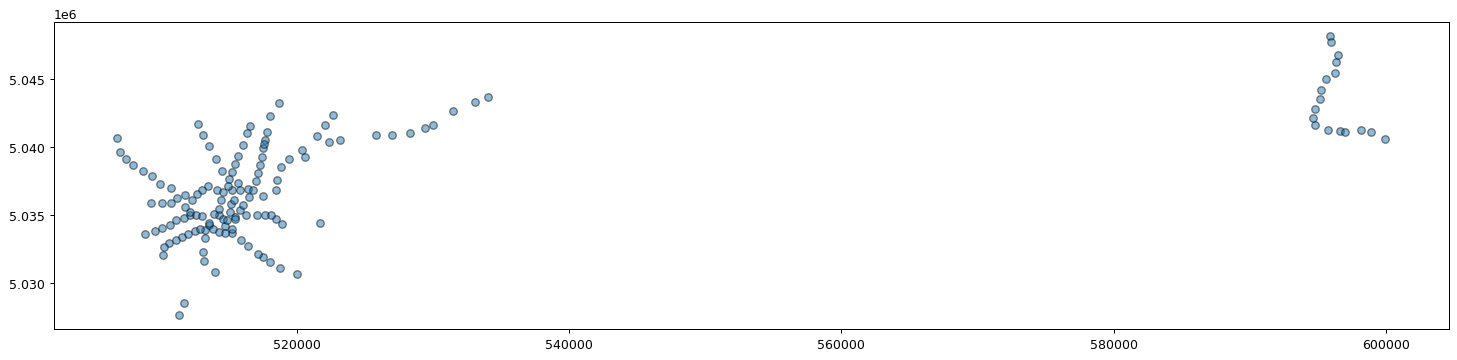

In [11]:
ax = stations.plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k") # raw visualization in original CRS

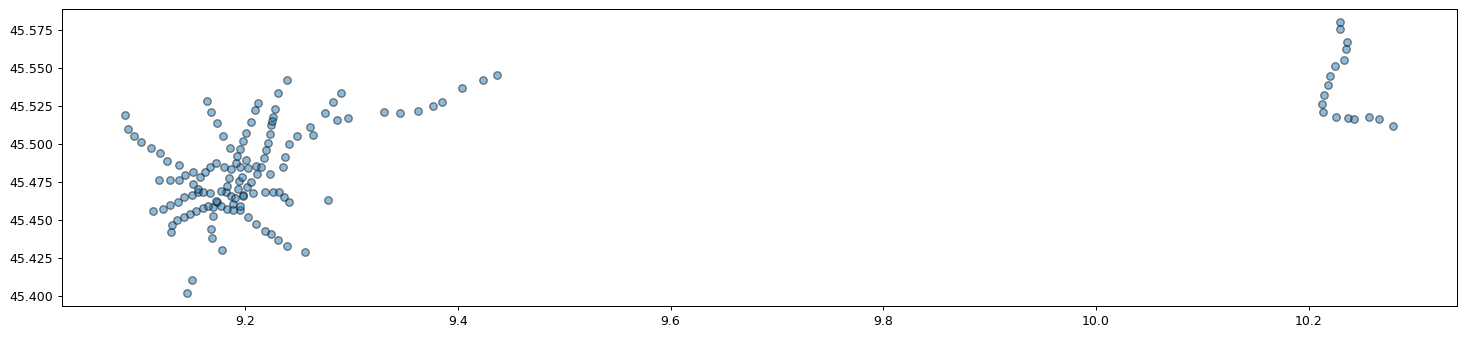

In [12]:
ax = stations.to_crs(4326).plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k") # raw visualization in 4326 (WGS-84)

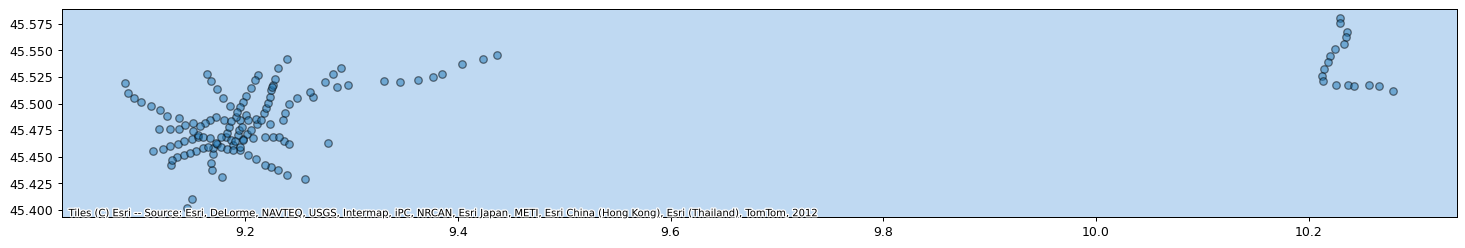

In [13]:
ax = stations.to_crs(4326).plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, source=cx.providers.Esri.WorldStreetMap, 
               zoom=11) # adding basemap but obtaining Gulf of Guinea sea

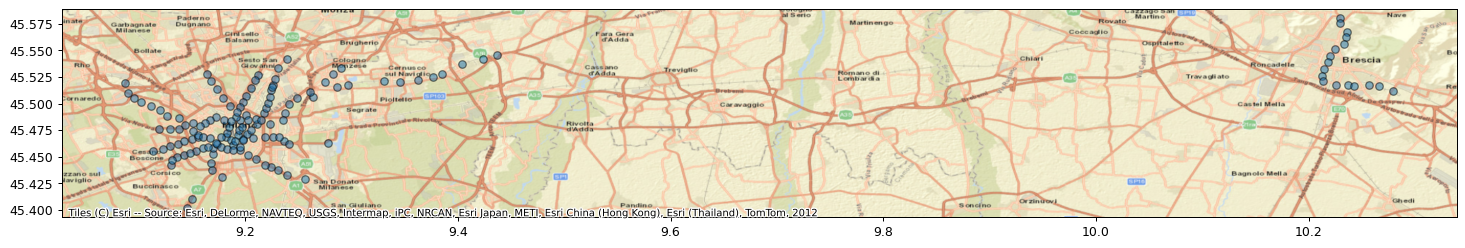

In [14]:
ax = stations.to_crs(4326).plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, source=cx.providers.Esri.WorldStreetMap, 
               zoom=11, crs=4326) # correctly specifying CRS for basemap

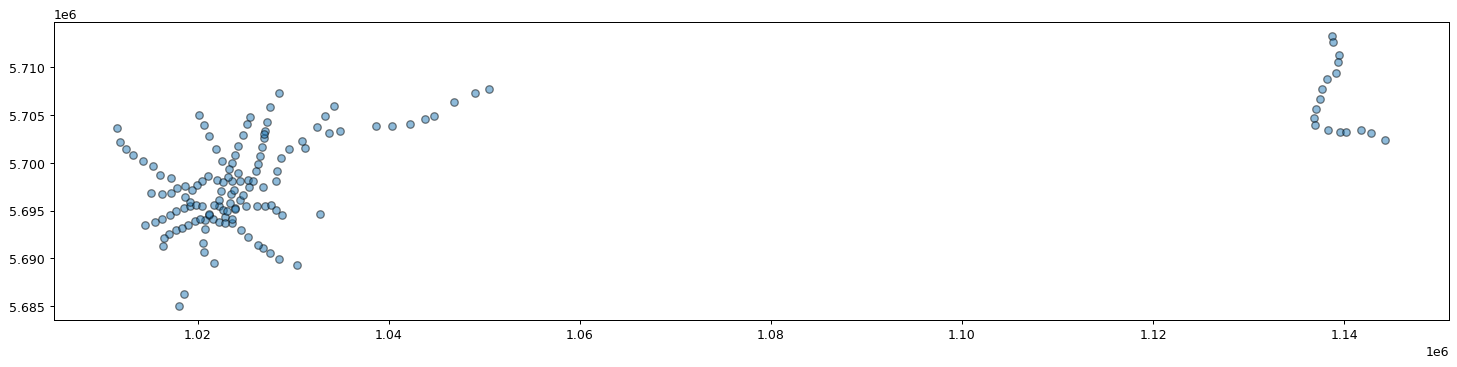

In [15]:
ax = stations.to_crs(3857).plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k") # converting to 3857

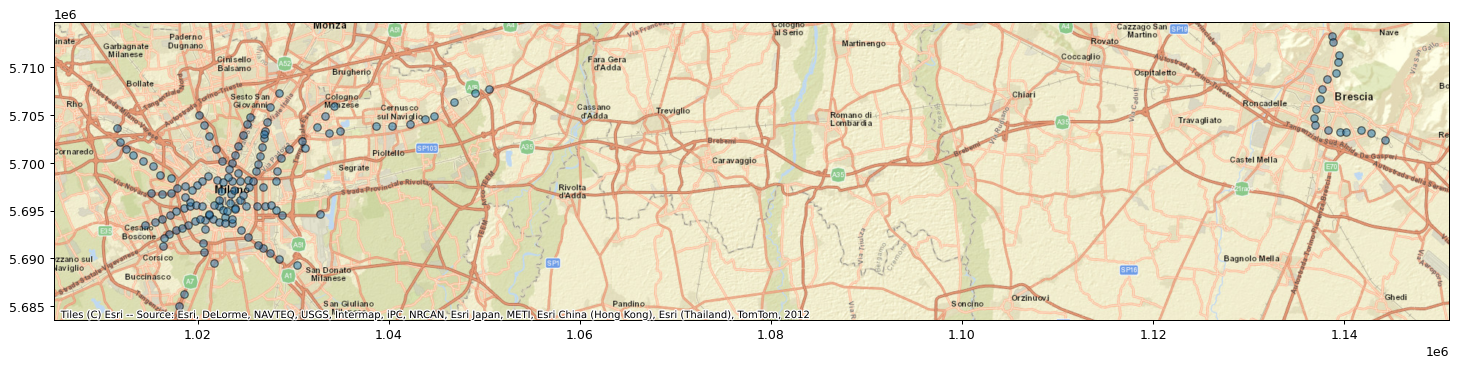

In [16]:
ax = stations.to_crs(3857).plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, source=cx.providers.Esri.WorldStreetMap, 
               zoom=11) # unveiling the 3857 is the default CRS for contextily

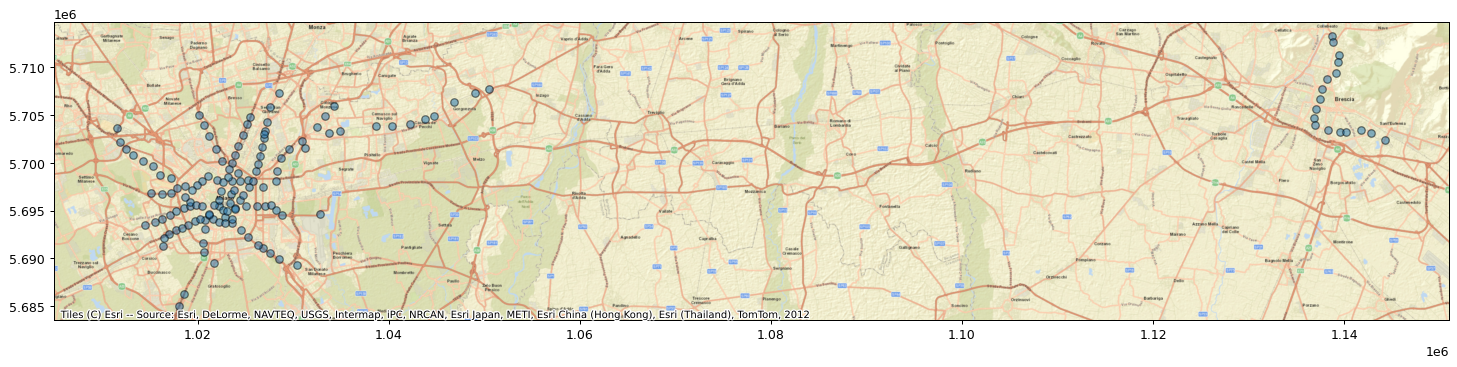

In [17]:
ax = stations.to_crs(3857).plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, source=cx.providers.Esri.WorldStreetMap) 
# if not specified, contextily will automatically select a zoom value (higher means longer loading time)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fa7d5e689f0>

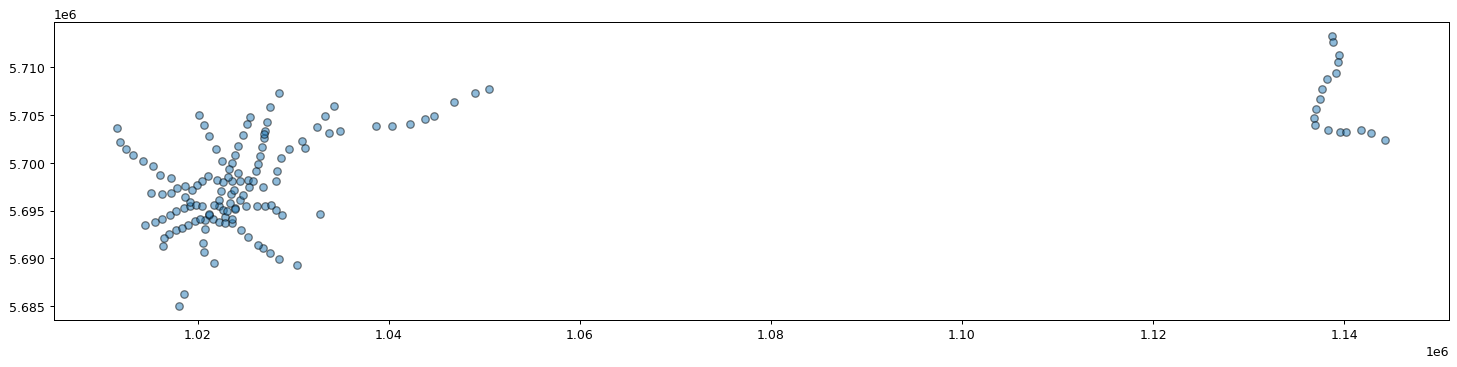

In [18]:
ax = stations.to_crs(3857).plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, zoom=11) # OpenStreetMap, the default provider for contextily, has been offline for a while

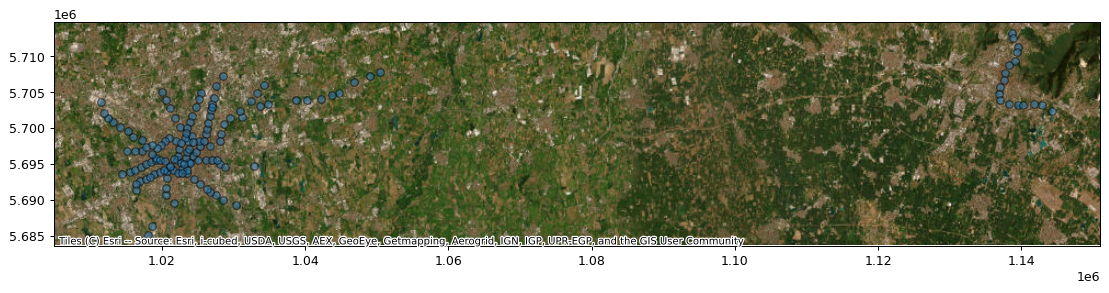

In [19]:
ax = stations.to_crs(3857).plot(figsize=(15, 15), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, 
               zoom=10) # a different source

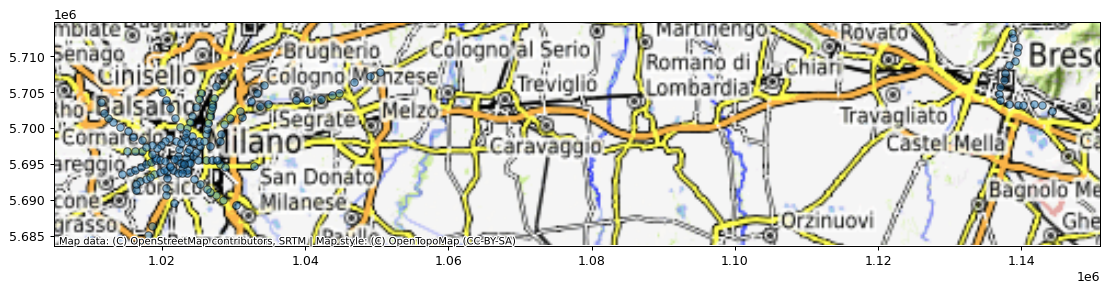

In [20]:
ax = stations.to_crs(3857).plot(figsize=(15, 15), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, source=cx.providers.OpenTopoMap, 
               zoom=9) # a different source

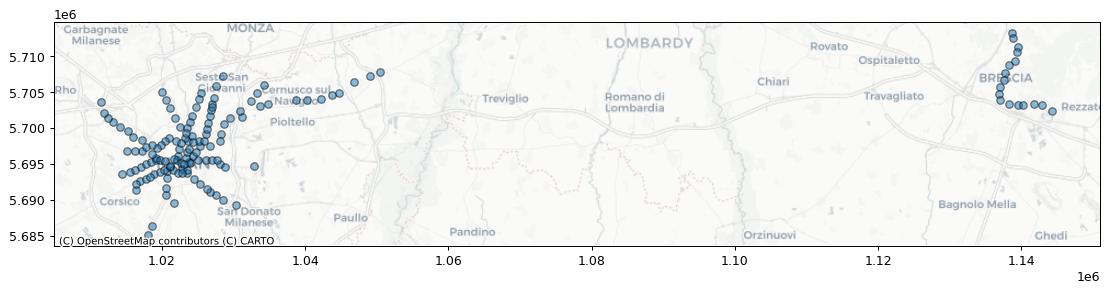

In [21]:
ax = stations.to_crs(3857).plot(figsize=(15, 15), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, 
               zoom=10) # a different source

## Raster data
### Demo of rasterio

In [22]:
import shapely
import rasterio
import numpy as np
import geopandas as gpd
import contextily as cx

rng = np.random.default_rng(seed=2024)

In [23]:
stations = gpd.read_file('Stazioni_Metropolitana.shp')
centrale = stations[stations.NOME == 'Centrale Fs']
centrale.to_crs(4326)

OBJECTID  ID_FERMATA         NOME  LINEA  CODSAF  COMUNE  \
143       144         405  Centrale Fs    2.0     0.0     0.0   

                     DTIPO_MOD   COD_LM  \
143  Stazione di metropolitana  MM2-MM3   

                                            NOME_LM                  geometry  
143  Linea 2 - Linea Verde - Linea 3 - Linea Gialla  POINT (9.20218 45.48444)

In [24]:
centrale.to_crs(3035).total_bounds

array([4258534.84430419, 2486119.10303801, 4258534.84430419,
       2486119.10303801])

We create equivalent affine transformations that are positioned in the area of Centrale station, in CRS 3035.

In [25]:
aff1 = rasterio.Affine(10, 0, 4258000, 0, -10, 2487000)
aff2 = rasterio.transform.from_origin(4258000, 2487000, 10, 10)
aff3 = rasterio.transform.from_bounds(4258000, 2486000, 4259000, 2487000, 100, 100)
aff1, aff2, aff3

(Affine(10.0, 0.0, 4258000.0,
        0.0, -10.0, 2487000.0),
 Affine(10.0, 0.0, 4258000.0,
        0.0, -10.0, 2487000.0),
 Affine(10.0, 0.0, 4258000.0,
        0.0, -10.0, 2487000.0))

We generate fake raster data along 25 years.

In [26]:
filepath = "test_raster.tif"
number_of_years = 25
data = rng.random(
    size=(number_of_years, 100, 100), dtype=np.float32
)  # 25 bands, each 100x100 pixels
years = [str(year) for year in range(2000, 2000 + number_of_years)]

# Create a mock raster file
profile = {
    "driver": "GTiff",
    "count": number_of_years,
    "dtype": "float32",
    "width": 100,
    "height": 100,
    "crs": "EPSG:3035",
    "transform": aff3,
    "nodata": None,
    "blockxsize": 64,
    "blockysize": 64,
    "tiled": "yes",
    "compress": "deflate"
}

with rasterio.open(filepath, "w", **profile) as dst:
    for i in range(number_of_years):
        dst.write(data[i, :, :], i + 1)
        dst.set_band_description(i + 1, years[i])

In [27]:
with rasterio.open('test_raster.tif') as src:
    # Access metadata
    print(src.meta)
    print(src.tags())
    # Read the entire raster as a numpy array
    data = src.read()

    # Read a specific band (e.g., band 1)
    band1 = src.read(1)

    coords = src.bounds
    crs = src.crs


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 100, 'height': 100, 'count': 25, 'crs': CRS.from_epsg(3035), 'transform': Affine(10.0, 0.0, 4258000.0,
       0.0, -10.0, 2487000.0)}
{'AREA_OR_POINT': 'Area'}


In [28]:
coords

BoundingBox(left=4258000.0, bottom=2486000.0, right=4259000.0, top=2487000.0)

In [29]:
bounding_box = gpd.GeoDataFrame(geometry=[shapely.geometry.box(*coords)], crs=crs)

We confirm that the square we wrote in the raster file is geolocated in proximity of Milano Centrale station.

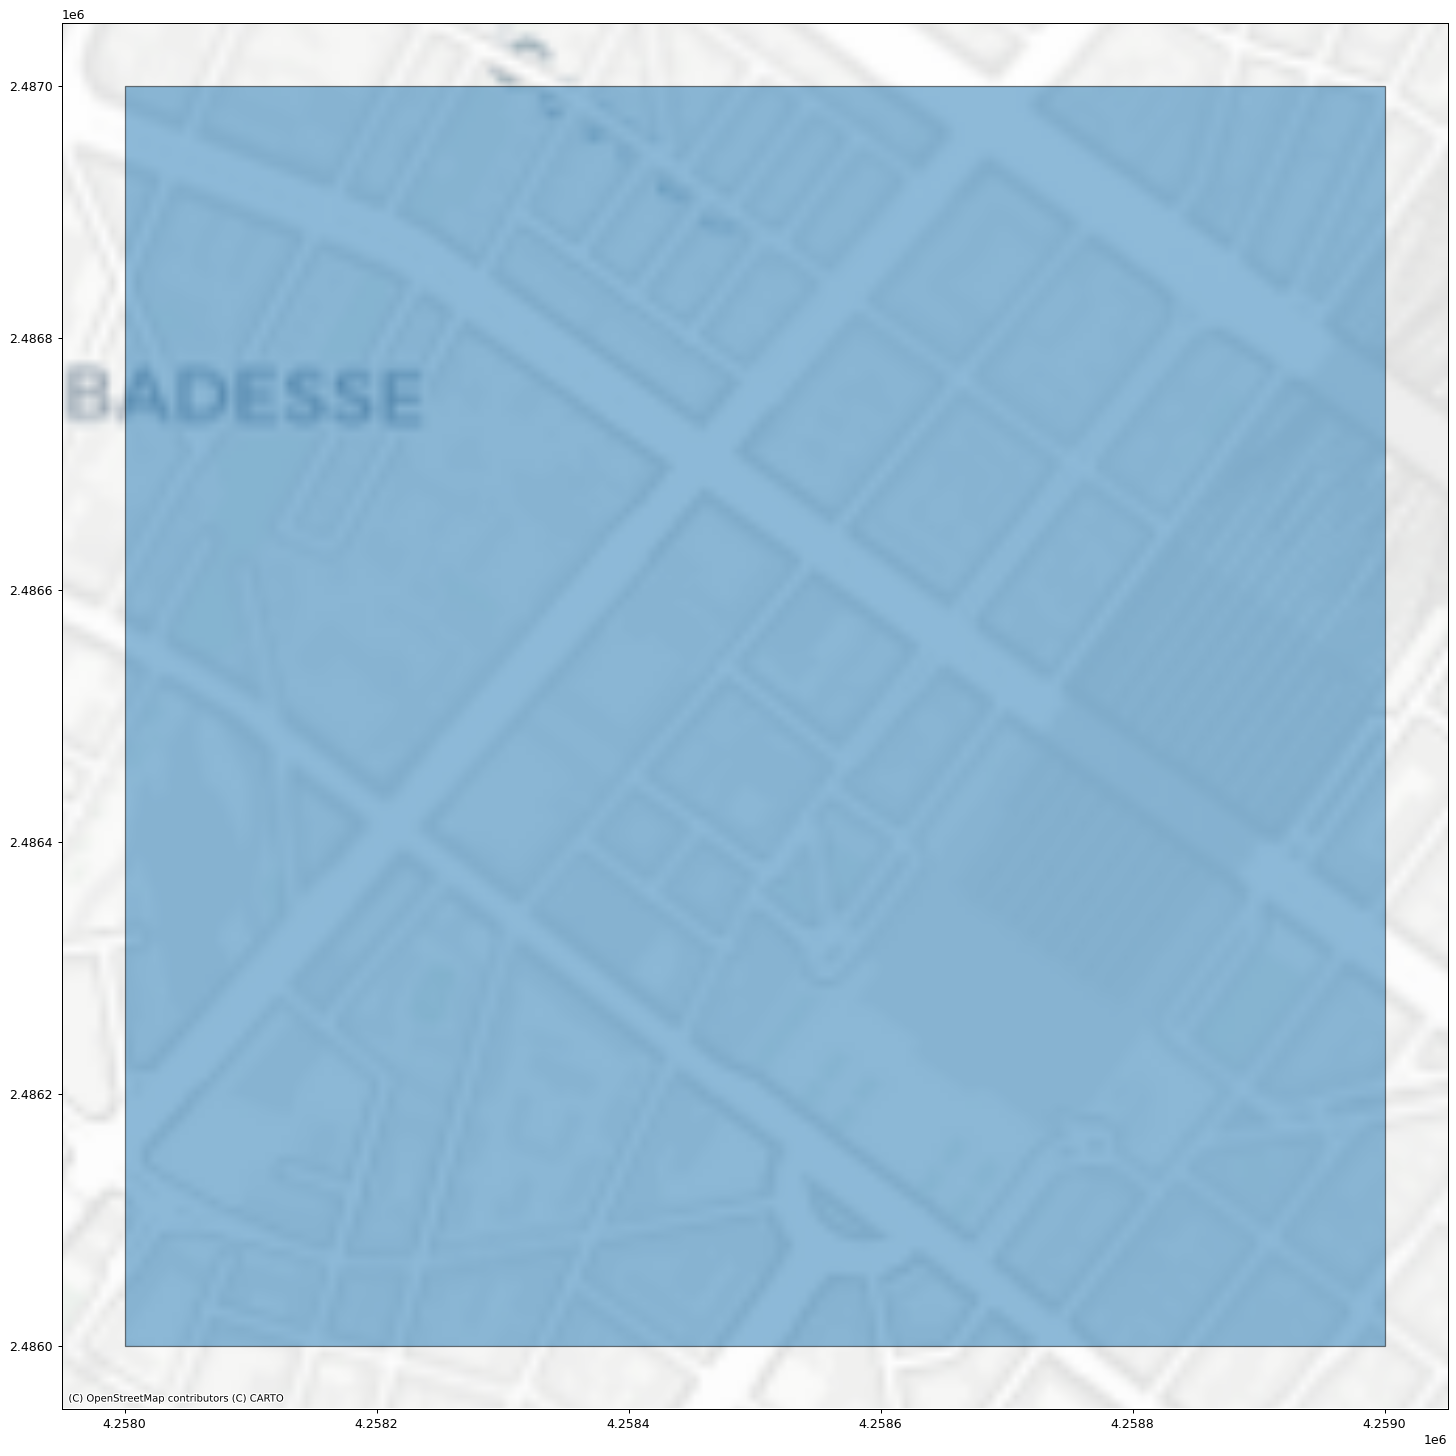

In [30]:
ax = bounding_box.plot(figsize=(20, 20), alpha=0.5,
                                edgecolor="k")
cx.add_basemap(ax, crs = crs,
               source=cx.providers.CartoDB.Positron, 
               zoom=14)

In [31]:
band1.shape

(100, 100)

In [32]:
with rasterio.open('test_raster.tif') as src:
    print(f"Dimensions: {src.width}, {src.height}")
    print(f"Number of bands: {src.count}")
    print(f"Coordinate system: {src.crs}")
    print(f"Geotransform: {src.transform}")

Dimensions: 100, 100
Number of bands: 25
Coordinate system: EPSG:3035
Geotransform: | 10.00, 0.00, 4258000.00|
| 0.00,-10.00, 2487000.00|
| 0.00, 0.00, 1.00|


In [33]:
with rasterio.open('test_raster.tif') as src:
    print(f"Dimensions: {src.meta['width']}, {src.meta['height']}")
    print(f"Number of bands: {src.meta['count']}")
    print(f"Coordinate system: {src.meta['crs']}")
    print(f"Geotransform: {src.meta['transform']}")
    block_size = src.block_shapes
    profile = src.meta
    # Read data in blocks (lazy mode, use for files that don't fit in RAM)
    for ji, window in src.block_windows():
        block_data = src.read(window=window)
        print(block_data.shape)

Dimensions: 100, 100
Number of bands: 25
Coordinate system: EPSG:3035
Geotransform: | 10.00, 0.00, 4258000.00|
| 0.00,-10.00, 2487000.00|
| 0.00, 0.00, 1.00|
(25, 64, 64)
(25, 64, 36)
(25, 36, 64)
(25, 36, 36)


### Demo of xarray

In [34]:
import xarray as xr

In [35]:
# Open the NetCDF file
ds = xr.open_dataset('tos_O1_2001-2002.nc')
# Print an overview of the dataset
ds

<xarray.Dataset>
Dimensions:    (lon: 180, bnds: 2, lat: 170, time: 24)
Coordinates:
  * lon        (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * lat        (lat) float64 -79.5 -78.5 -77.5 -76.5 ... 86.5 87.5 88.5 89.5
  * time       (time) object 2001-01-16 00:00:00 ... 2002-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/13)
    title:          IPSL  model output prepared for IPCC Fourth Assessment SR...
    institution:    IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:         IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96...
    contact:        Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id:     IPCC Fourth Assessment
    table_id:       Table O1 (13 November 2004)
    ...             ...
    realization:    1
    cmor_version:   0.96
    Conventions:    CF-1.0
    history:        YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed...
    references:     Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment:        Test drive

In [36]:
ds['tos']

<xarray.DataArray 'tos' (time: 24, lat: 170, lon: 180)>
[734400 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * lat      (lat) float64 -79.5 -78.5 -77.5 -76.5 -75.5 ... 86.5 87.5 88.5 89.5
  * time     (time) object 2001-01-16 00:00:00 ... 2002-12-16 00:00:00
Attributes:
    standard_name:   sea_surface_temperature
    long_name:       Sea Surface Temperature
    units:           K
    cell_methods:    time: mean (interval: 30 minutes)
    original_name:   sosstsst
    original_units:  degC
    history:          At   16:37:23 on 01/11/2005: CMOR altered the data in t...

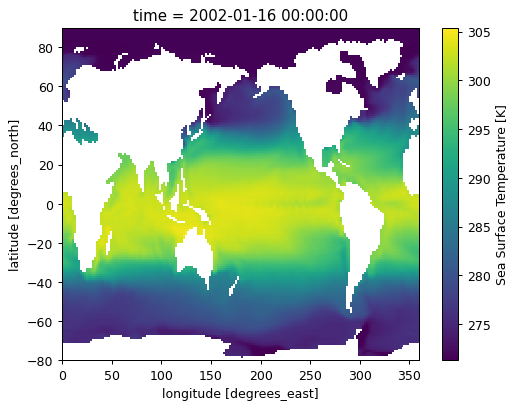

In [37]:
ds['tos'].sel(time='2002-01-16').plot();

In [38]:
ds['tos'].sel(time=slice('2002-01-10','2002-01-30'))

<xarray.DataArray 'tos' (time: 1, lat: 170, lon: 180)>
[30600 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * lat      (lat) float64 -79.5 -78.5 -77.5 -76.5 -75.5 ... 86.5 87.5 88.5 89.5
  * time     (time) object 2002-01-16 00:00:00
Attributes:
    standard_name:   sea_surface_temperature
    long_name:       Sea Surface Temperature
    units:           K
    cell_methods:    time: mean (interval: 30 minutes)
    original_name:   sosstsst
    original_units:  degC
    history:          At   16:37:23 on 01/11/2005: CMOR altered the data in t...

In [39]:
# Perform some operations
modified_ds = ds['tos'] - 273.15 # Convert Kelvin to Celsius
# # Save to a new NetCDF file
modified_ds.to_netcdf('modified_temperature.nc')

In [40]:
ds['tos'].isel(time=0,lat=150,lon=90)

<xarray.DataArray 'tos' ()>
array(271.59525, dtype=float32)
Coordinates:
    lon      float64 181.0
    lat      float64 70.5
    time     object 2001-01-16 00:00:00
Attributes:
    standard_name:   sea_surface_temperature
    long_name:       Sea Surface Temperature
    units:           K
    cell_methods:    time: mean (interval: 30 minutes)
    original_name:   sosstsst
    original_units:  degC
    history:          At   16:37:23 on 01/11/2005: CMOR altered the data in t...

In [41]:
ds['tos'].isel(time=0,lat=150,lon=90).values

array(271.59525, dtype=float32)